<a href="https://colab.research.google.com/github/Najumsahar/README.md/blob/main/Risk_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
# Load Excel file
data = pd.read_excel("road_accident_risk_classification.xlsx")

# Basic preprocessing
data.dropna(inplace=True)  # Handle missing values

# Encode categorical variables
le_dict = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le

# Define features and target
# Check if 'Risk' is the correct column name. If not, replace it with the correct name.
# For example, if the column name is 'Accident_Risk_Level', use:
# X = data.drop('Accident_Risk_Level', axis=1)
# y = data['Accident_Risk_Level']
X = data.drop('Accident_Risk_Level', axis=1)
y = data['Accident_Risk_Level']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
def get_information_gain(X_train, y_train):
    model = DecisionTreeClassifier(criterion='entropy', random_state=0)
    model.fit(X_train, y_train)
    return model.feature_importances_, model

# Get Information Gain for each feature
info_gain, base_model = get_information_gain(X_train, y_train)

# Create a feature importance DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Information_Gain': info_gain
}).sort_values(by='Information_Gain', ascending=False)

In [6]:
def evaluate_at_threshold(threshold):
    selected_features = importance_df[importance_df['Information_Gain'] > threshold]['Feature']
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')

    return {
        'threshold': threshold,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'selected_features': list(selected_features)
    }

# Evaluate on multiple thresholds
thresholds = [0, 0.01, 0.05, 0.1, 0.15]
results = [evaluate_at_threshold(t) for t in thresholds]
results_df = pd.DataFrame(results)

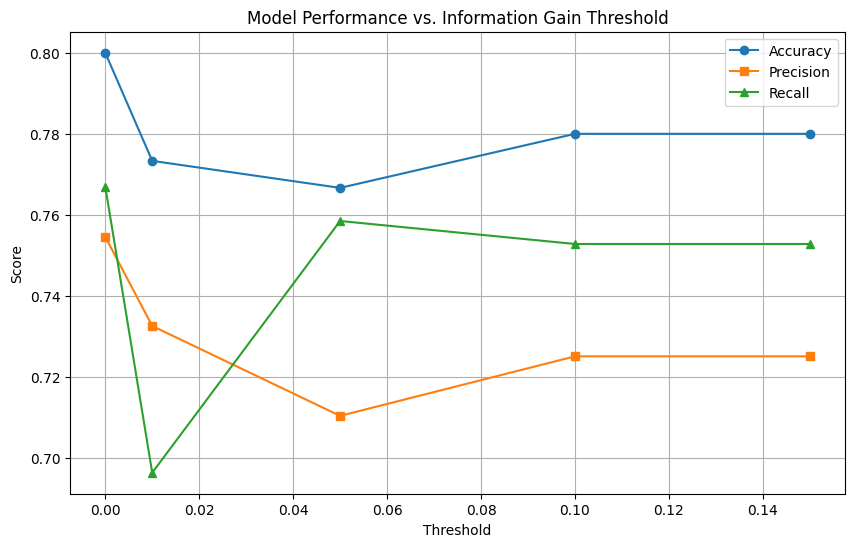

In [7]:
plt.figure(figsize=(10,6))
plt.plot(results_df['threshold'], results_df['accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['threshold'], results_df['precision'], marker='s', label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], marker='^', label='Recall')
plt.title('Model Performance vs. Information Gain Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
!pip install streamlit
import streamlit as st # Import the Streamlit library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

st.title("Feature Selection using Information Gain")
uploaded_file = st.file_uploader("Upload your Excel dataset", type=["xlsx"])

if uploaded_file:
    data = pd.read_excel(uploaded_file)
    st.write("Dataset Preview:")
    st.dataframe(data.head())

    data.dropna(inplace=True)

    # Encode categorical columns
    for col in data.select_dtypes(include='object').columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    X = data.drop('Risk', axis=1)
    y = data['Risk']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train with entropy to get Information Gain
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(X_train, y_train)
    feature_importance = model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Information_Gain': feature_importance
    }).sort_values(by='Information_Gain', ascending=False)

    st.subheader("Feature Importances (Information Gain)")
    st.dataframe(importance_df)

    threshold = st.slider("Select Information Gain Threshold", 0.0, 0.2, 0.01, 0.01)
    selected_features = importance_df[importance_df['Information_Gain'] > threshold]['Feature']
    st.write(f"Selected Features at threshold {threshold}:", list(selected_features))

    # Retrain with selected features
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    final_model = DecisionTreeClassifier()
    final_model.fit(X_train_sel, y_train)
    y_pred = final_model.predict(X_test_sel)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')

    st.success(f"Accuracy: {acc:.2f}")
    st.success(f"Precision: {prec:.2f}")
    st.success(f"Recall: {rec:.2f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


2025-04-21 08:55:49.545 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 08:55:49.641 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-21 08:55:49.642 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 08:55:49.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 08:55:49.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 08:55:49.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 08:55:49.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 08:55:49.650 Thread 'MainThread': mi